# 20421743

### 1a. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
url = 'https://raw.githubusercontent.com/jivizcaino/PWT10.1/main/pwt101.csv'
pwt101 = pd.read_csv(url)
print('Number of rows and columns:', pwt101.shape)

Number of rows and columns: (12810, 52)


### 1b.

In [3]:
pwt101_subset1 = pwt101[['countrycode', 'country', 'year', 'rgdpo', 'emp', 'avh', 'hc', 'labsh', 'rtfpna', 'cn']]

print('Number of rows and columns:', pwt101_subset1.shape)

Number of rows and columns: (12810, 10)


### 1c.

Logic behind my choice of year: 

The point of this exercise is to update the work of Caselli (2003), which uses data from 1996 (PWT6.1). 
I decided to find the latest year with the most observations from the last 10 years of PWT10.1; 2010-2019. 
I find 2019, which is also the the most recent year of PWT 10.1, with 61 observations/countries with complete data for all variables of interest.

Without filtering for the most recent 10 years, I found the year to be 2002, with 64 observations/countries. 

It seemed counter-intuitive to use data that was 17 years older, for the benefit of only 3 more observations; I feel I make a greater contribution to academic literature by choosing 2019.

In [4]:
pwt101_subset1_cleaned = pwt101_subset1.dropna()
pwt101_subset1_cleaned = pwt101_subset1_cleaned.set_index('countrycode')

print('Number of rows and columns:', pwt101_subset1_cleaned.shape)

Number of rows and columns: (3134, 9)


In [5]:
variables = ['rgdpo', 'emp', 'avh', 'hc', 'labsh', 'rtfpna', 'cn']
observations_per_year = pwt101_subset1_cleaned.groupby('year')[variables].count()
observations_per_year_2010_onwards = observations_per_year.loc[observations_per_year.index > 2009]

print(observations_per_year_2010_onwards)

      rgdpo  emp  avh  hc  labsh  rtfpna  cn
year                                        
2010     61   61   61  61     61      61  61
2011     61   61   61  61     61      61  61
2012     61   61   61  61     61      61  61
2013     61   61   61  61     61      61  61
2014     60   60   60  60     60      60  60
2015     60   60   60  60     60      60  60
2016     61   61   61  61     61      61  61
2017     61   61   61  61     61      61  61
2018     61   61   61  61     61      61  61
2019     61   61   61  61     61      61  61


In [6]:
pwt101_subset1_cleaned_2019 = pwt101_subset1_cleaned[pwt101_subset1_cleaned['year'] == 2019]
pwt101_subset1_cleaned_2019.columns = ['Country', 'Year', 'Y', 'E', 'avh', 'h', 'one_minus_alpha', 'A', 'K']

print('Number of rows and columns:', pwt101_subset1_cleaned_2019.shape)
pwt101_subset1_cleaned_2019.head()

Number of rows and columns: (61, 9)


,Country,Year,Y,E,avh,h,one_minus_alpha,A,K
countrycode,,,,,,,,,
ARG,Argentina,2019,977420.563,20.643,1609.069,3.097,0.544,0.929,3183182.250
AUS,Australia,2019,1364677.750,12.863,1726.798,3.550,0.572,0.976,5866471.000
AUT,Austria,2019,477705.500,4.550,1611.374,3.381,0.584,0.995,2630129.500
BEL,Belgium,2019,517419.750,4.922,1586.431,3.149,0.595,0.990,3078800.500
BGR,Bulgaria,2019,149432.422,3.420,1645.246,3.186,0.528,1.016,433185.906


### 1d.

In [7]:
# output per worker (y), y = Y/E

pwt101_subset1_cleaned_2019['y'] = pwt101_subset1_cleaned_2019['Y'] / pwt101_subset1_cleaned_2019['E']

print('Number of rows and columns:', pwt101_subset1_cleaned_2019.shape)

Number of rows and columns: (61, 10)


C:\Users\olive\AppData\Local\Temp\ipykernel_4656\1694469569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pwt101_subset1_cleaned_2019['y'] = pwt101_subset1_cleaned_2019['Y'] / pwt101_subset1_cleaned_2019['E']


In [8]:
Q1d_data = pwt101_subset1_cleaned_2019.copy()

print('Number of rows and columns:', Q1d_data.shape)
Q1d_data.head()

Number of rows and columns: (61, 10)


,Country,Year,Y,E,avh,h,one_minus_alpha,A,K,y
countrycode,,,,,,,,,,
ARG,Argentina,2019,977420.563,20.643,1609.069,3.097,0.544,0.929,3183182.250,47348.765344
AUS,Australia,2019,1364677.750,12.863,1726.798,3.550,0.572,0.976,5866471.000,106093.271399
AUT,Austria,2019,477705.500,4.550,1611.374,3.381,0.584,0.995,2630129.500,104990.219780
BEL,Belgium,2019,517419.750,4.922,1586.431,3.149,0.595,0.990,3078800.500,105123.882568
BGR,Bulgaria,2019,149432.422,3.420,1645.246,3.186,0.528,1.016,433185.906,43693.690643


In [9]:
us_y = Q1d_data.loc[Q1d_data['Country'] == 'United States', 'y'].values[0]

summary_statistics = {
    'Statistic': ['Mean', 'Std Dev', 'Min', 'Max'],
    'y': [
        np.mean(Q1d_data['y']),
        np.std(Q1d_data['y']),
        np.min(Q1d_data['y']),
        np.max(Q1d_data['y'])],
    'y_ratio_to_us': [
        np.mean(Q1d_data['y']) / us_y,
        np.std(Q1d_data['y']) / us_y,
        np.min(Q1d_data['y']) / us_y,
        np.max(Q1d_data['y']) / us_y ]}

percentiles = [5, 10, 25, 50, 75, 95]
for p in percentiles:
    percentile_value = np.percentile(Q1d_data['y'], p)
    summary_statistics['Statistic'].append(f'Percentile {p}')
    summary_statistics['y'].append(percentile_value)
    summary_statistics['y_ratio_to_us'].append(percentile_value / us_y)

summary_statistics_df = pd.DataFrame(summary_statistics)
summary_statistics_df = summary_statistics_df.round({'y': 0, 'y_ratio_to_us': 3})
summary_statistics_df = summary_statistics_df.set_index('Statistic') 

alignments = ['center'] * 3
print(tabulate(summary_statistics_df, headers='keys', tablefmt='presto', colalign=alignments))

   Statistic   |   y    |  y_ratio_to_us
---------------+--------+-----------------
     Mean      | 74115  |      0.57
    Std Dev    | 36204  |      0.278
      Min      | 18429  |      0.142
      Max      | 221705 |      1.704
 Percentile 5  | 23670  |      0.182
 Percentile 10 | 31745  |      0.244
 Percentile 25 | 43694  |      0.336
 Percentile 50 | 71979  |      0.553
 Percentile 75 | 96356  |      0.741
 Percentile 95 | 129100 |      0.992


In [10]:
closest_country_name = []
closest_country_code = []
for statistic in summary_statistics['y']:
    closest_country = (Q1d_data['y'] - statistic).abs().argmin()
    closest_country_code.append(Q1d_data.index[closest_country])
    closest_country_name.append(Q1d_data.iloc[closest_country]['Country'])

summary_statistics['Country'] = closest_country_name
summary_statistics['countrycode'] = closest_country_code

summary_statistics_df = pd.DataFrame(summary_statistics)
summary_statistics_df = summary_statistics_df[['countrycode', 'Country', 'Statistic', 'y', 'y_ratio_to_us']]
summary_statistics_df = summary_statistics_df.round({'y': 0, 'y_ratio_to_us': 3})
summary_statistics_df = summary_statistics_df.set_index('countrycode') 

alignments = ['center'] * 5
print(tabulate(summary_statistics_df, headers='keys', tablefmt='presto', colalign=alignments))

  countrycode  |      Country       |   Statistic   |   y    |  y_ratio_to_us
---------------+--------------------+---------------+--------+-----------------
      POL      |       Poland       |     Mean      | 74115  |      0.57
      DOM      | Dominican Republic |    Std Dev    | 36204  |      0.278
      IND      |       India        |      Min      | 18429  |      0.142
      IRL      |      Ireland       |      Max      | 221705 |      1.704
      ECU      |      Ecuador       | Percentile 5  | 23670  |      0.182
      THA      |      Thailand      | Percentile 10 | 31745  |      0.244
      BGR      |      Bulgaria      | Percentile 25 | 43694  |      0.336
      JPN      |       Japan        | Percentile 50 | 71979  |      0.553
      ITA      |       Italy        | Percentile 75 | 96356  |      0.741
      CHE      |    Switzerland     | Percentile 95 | 129100 |      0.992


### 1e.

In [11]:
pwt101_y_vars_only = pwt101[['countrycode', 'country', 'year', 'rgdpo', 'emp']]
pwt101_y_vars_only_cleaned = pwt101[['countrycode', 'country', 'year', 'rgdpo', 'emp']].dropna()
Q1e_data = pwt101_y_vars_only_cleaned[pwt101_y_vars_only_cleaned['year'] == 2019].copy()
Q1e_data = Q1e_data.set_index('countrycode')
Q1e_data.columns = ['Country', 'Year', 'Y', 'E',]

Q1e_data['y_2'] = Q1e_data['Y'] / Q1e_data['E'] 

print('Number of rows and columns:', Q1e_data.shape)
Q1e_data.head()

Number of rows and columns: (177, 5)


,Country,Year,Y,E,y_2
countrycode,,,,,
ABW,Aruba,2019,3467.300,0.048,72235.416667
AGO,Angola,2019,227855.719,16.645,13689.139021
ALB,Albania,2019,36103.043,1.076,33553.013941
ARE,United Arab Emirates,2019,645956.250,5.809,111199.216733
ARG,Argentina,2019,977420.563,20.643,47348.765344


In [12]:
us_y_2 = Q1e_data.loc[Q1e_data['Country'] == 'United States', 'y_2'].values[0]

summary_statistics_2 = {
    'Statistic': ['Mean', 'Std Dev', 'Min', 'Max'],
    'y_2': [
        np.mean(Q1e_data['y_2']),
        np.std(Q1e_data['y_2']),
        np.min(Q1e_data['y_2']),
        np.max(Q1e_data['y_2'])],
    'y_2_ratio_to_us': [
        np.mean(Q1e_data['y_2']) / us_y,
        np.std(Q1e_data['y_2']) / us_y,
        np.min(Q1e_data['y_2']) / us_y,
        np.max(Q1e_data['y_2']) / us_y ]}

percentiles_2 = [5, 10, 25, 50, 75, 95]
for p in percentiles_2:
    percentile_value_2 = np.percentile(Q1e_data['y_2'], p)
    summary_statistics_2['Statistic'].append(f'Percentile {p}')
    summary_statistics_2['y_2'].append(np.percentile(Q1e_data['y_2'], p))
    summary_statistics_2['y_2_ratio_to_us'].append(percentile_value_2 / us_y_2)

closest_country_name_2 = []
closest_country_code_2 = []
for statistic in summary_statistics_2['y_2']:
    closest_country_2 = (Q1e_data['y_2'] - statistic).abs().argmin()
    closest_country_code_2.append(Q1e_data.index[closest_country_2])
    closest_country_name_2.append(Q1e_data.iloc[closest_country_2]['Country'])
summary_statistics_2['Country'] = closest_country_name_2
summary_statistics_2['countrycode'] = closest_country_code_2

summary_statistics_2_df = pd.DataFrame(summary_statistics_2)
summary_statistics_2_df = summary_statistics_2_df[['countrycode', 'Country', 'Statistic', 'y_2', 'y_2_ratio_to_us']]
summary_statistics_2_df = summary_statistics_2_df.round({'y_2': 0, 'y_2_ratio_to_us': 3})
summary_statistics_2_df = summary_statistics_2_df.set_index('countrycode')

alignments = ['center'] * 5
print(tabulate(summary_statistics_2_df, headers='keys', tablefmt='presto', colalign=alignments))

  countrycode  |              Country               |   Statistic   |  y_2   |  y_2_ratio_to_us
---------------+------------------------------------+---------------+--------+-------------------
      ARG      |             Argentina              |     Mean      | 47243  |       0.363
      ZAF      |            South Africa            |    Std Dev    | 39022  |        0.3
      VEN      | Venezuela (Bolivarian Republic of) |      Min      |  612   |       0.005
      IRL      |              Ireland               |      Max      | 221705 |       1.704
      HTI      |               Haiti                | Percentile 5  |  3793  |       0.029
      UGA      |               Uganda               | Percentile 10 |  5978  |       0.046
      VNM      |              Viet Nam              | Percentile 25 | 14368  |       0.11
      MKD      |          North Macedonia           | Percentile 50 | 38273  |       0.294
      GRC      |               Greece               | Percentile 75 | 67271  |  

In [13]:
print('Summary statistics of subset using all of the variables needed for this project:')
print(tabulate(summary_statistics_df, headers='keys', tablefmt='presto', colalign=alignments))
print('')
print('Summary statistics of subset using output per worker variables only:')
print(tabulate(summary_statistics_2_df, headers='keys', tablefmt='presto', colalign=alignments))

Summary statistics of subset using all of the variables needed for this project:
  countrycode  |      Country       |   Statistic   |   y    |  y_ratio_to_us
---------------+--------------------+---------------+--------+-----------------
      POL      |       Poland       |     Mean      | 74115  |      0.57
      DOM      | Dominican Republic |    Std Dev    | 36204  |      0.278
      IND      |       India        |      Min      | 18429  |      0.142
      IRL      |      Ireland       |      Max      | 221705 |      1.704
      ECU      |      Ecuador       | Percentile 5  | 23670  |      0.182
      THA      |      Thailand      | Percentile 10 | 31745  |      0.244
      BGR      |      Bulgaria      | Percentile 25 | 43694  |      0.336
      JPN      |       Japan        | Percentile 50 | 71979  |      0.553
      ITA      |       Italy        | Percentile 75 | 96356  |      0.741
      CHE      |    Switzerland     | Percentile 95 | 129100 |      0.992

Summary statistics of

In [14]:
print('Number of rows and columns, Subset 1:', Q1d_data.shape)
print('Number of rows and columns, Subset 2:', Q1e_data.shape)

Number of rows and columns, Subset 1: (61, 10)
Number of rows and columns, Subset 2: (177, 5)


### What conclusion can be drawn from the tables generated in 1d. and 1e.?
The table from Q1d, Table 1, has higher values of output per worker (y) than the table form Q1e, Table 2; seen by comparing the values of y at each percentile. This has happened because of how variables were dropped. 

Table 1 was generated with a subset (pwt101_subset1 = Subset 1) which included 5 variables which are needed later in the project, but are not explicity needed to compute output per worker. 
Table 2 was generated with a subset (pwt101_y_vars_only = Subset 2) which included only the variables required to compute output per worker: (countrycode, country, year, aggregate output (Y), employment (E)). 
This can be seen in the output of the above cell, by the different number of columns.

Each subset was cleaned such that, if there was a missing value in a cell below each of the columns/variables, the entire row for that country-year pair was deleted. In both cases, this left a complete dataset with no missing values, which was filtered to only include values in the year 2019 before computing output per worker. The 5 extra variables which Subset 1 contains have missing values, so more country-year pairs were dropped in Subset 1 than in Subset 2. To be exact, by looking at the output of the above cell, Subset 1 has 115 less rows than Subset 2. 

Subset 1 generated a higher y than Subset 2 did. This implies that the countries which had missing values in the 5 'unneccessary' variables, tended to also have a low y. Therefore, by removing them, y increased. Higher y is likely correlated with richer countries. If the previous sentence is true, Subset 1 has filtered out generally poorer countries.

Why does this matter? Question 2, and other questions in the project, use Subset 1, so we should bear in mind that this subset contains countries which are on average richer, or at least have a higher y, than those of the entire PWT10.1 dataset.

### 2a.

In [15]:
Q2_data = pwt101_subset1_cleaned_2019.copy()

print('Number of rows and columns initially in Q2_data:', Q2_data.shape)

Number of rows and columns initially in Q2_data: (61, 10)


In [16]:
# capital stock per worker (k) = K/E

Q2_data['k'] = Q2_data['K'] / Q2_data['E']

Q2_data['ln_y'] = np.log(Q2_data['y'])
Q2_data['ln_k'] = np.log(Q2_data['k'])
Q2_data['ln_h'] = np.log(Q2_data['h'])

print('Number of rows and columns:', Q2_data.shape)

Number of rows and columns: (61, 14)


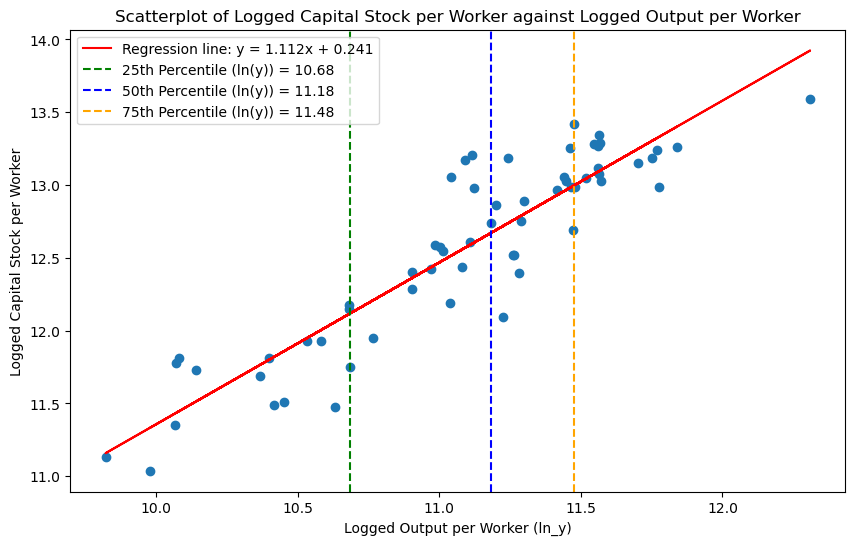

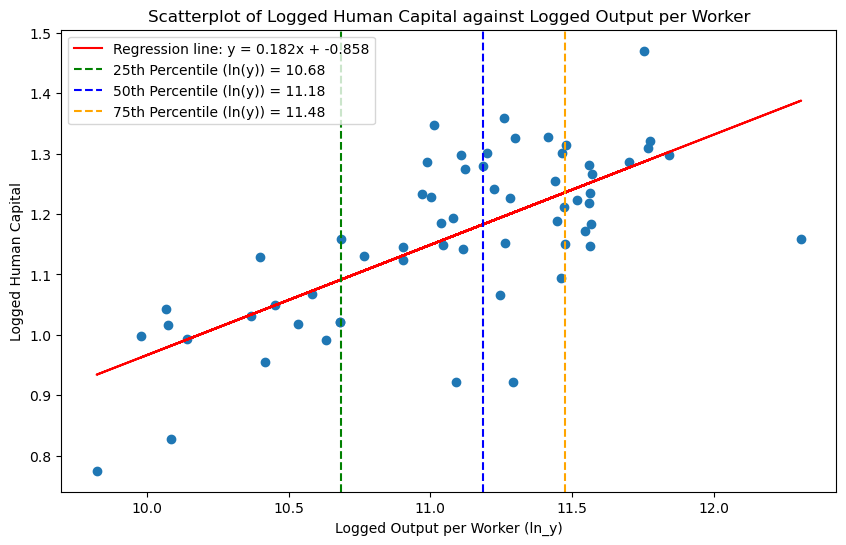

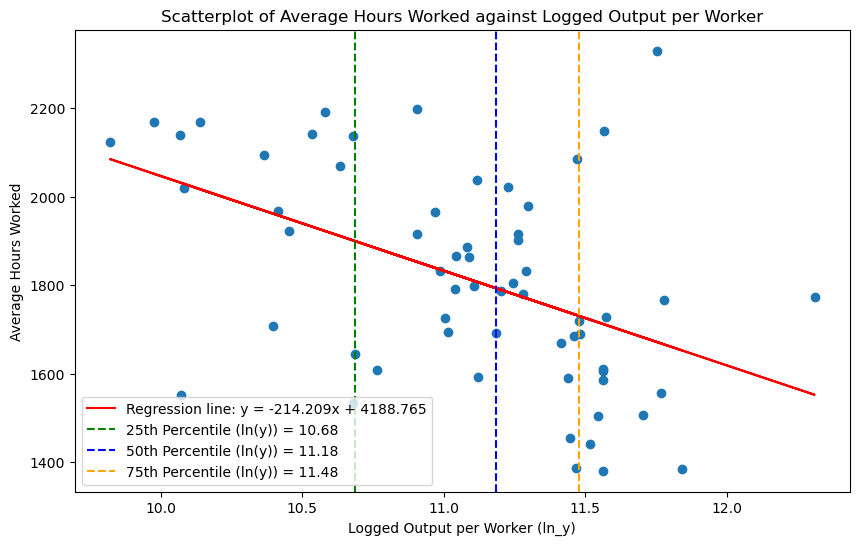

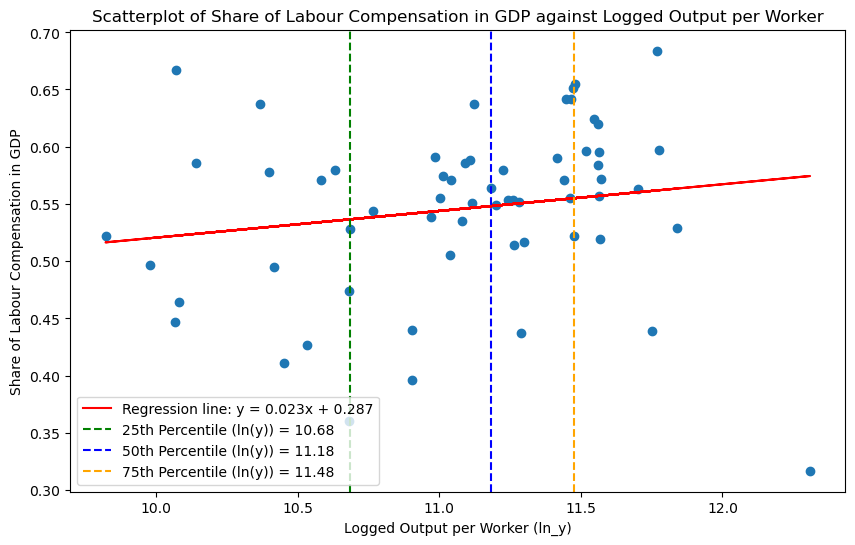

In [17]:
y_variables = {
    'ln_k': 'Logged Capital Stock per Worker',
    'ln_h': 'Logged Human Capital',
    'avh': 'Average Hours Worked',
    'one_minus_alpha': 'Share of Labour Compensation in GDP'}

for y_variable, y_label in y_variables.items():
    plt.figure(figsize=(10,6))
    plt.scatter(Q2_data['ln_y'], Q2_data[y_variable])
    x_Q2 = Q2_data['ln_y']
    y_Q2 = Q2_data[y_variable]
    
    slope, intercept = np.polyfit(x_Q2, y_Q2, 1)
    Q2_data['regression_line'] = slope * x_Q2 + intercept
    plt.plot(x_Q2, Q2_data['regression_line'], color='red', label = f'Regression line: y = {slope:.3f}x + {intercept:.3f}')

    x_25th = np.percentile(x_Q2, 25)
    x_50th = np.percentile(x_Q2, 50)
    x_75th = np.percentile(x_Q2, 75)
    plt.axvline(x=x_25th, color='green', linestyle='--', label=f'25th Percentile (ln(y)) = {x_25th:.2f}')
    plt.axvline(x=x_50th, color='blue', linestyle='--', label=f'50th Percentile (ln(y)) = {x_50th:.2f}')
    plt.axvline(x=x_75th, color='orange', linestyle='--', label=f'75th Percentile (ln(y)) = {x_75th:.2f}')

    plt.xlabel('Logged Output per Worker (ln_y)')
    plt.ylabel(y_label)
    plt.title(f'Scatterplot of {y_label} against Logged Output per Worker')
    plt.legend()
    plt.show()

### 2b. 

In what follows, $ y $ = output per worker and $ ln_y $ = logged output per worker

##### 1. Logged Capital Stock per Worker against $ ln_y $

Direct relationship: as $ y $ increases, the Capital Stock per Worker increases. 
    
Numerically, a 1% increase in $ y $ causes a 1.112% increase in Capital Stock per Worker. 

##### 2. Logged Human Capital per Worker against $ ln_y $
    
Direct relationship: as $ y $ increases, the Capital Stock per Worker increases. 
    
Numerically, a 1% increase in $ y $ causes a 0.182% increase in Human Capital per Worker.

##### 3. Average Hours Worked against $ ln_y $

Inverse relationship: as $ y $ increases, the average hours worked decreases. 

Numerically, for every 1 unit increase in $ ln_y $, the average hours worked decreases by 214.2 hours. 

##### 4. Share of Labour Compensation in GDP against $ ln_y $

Direct relationship: as $ y $ increases, the Share of Labour Compensation in GDP increases

Numerically, for every 1 unit increase in $ ln_y $, the share of Labour Compensation in GDP increases by 0.023%

##### Intuition

A comparison of Graph 1 and 2 suggests that significantly more of the variance in $ y $ is explained by differences in physical capital rather than human capital. This is tested in Q4.

Graph 3 suggests that average hours worked and output per worker are negatively correlated. This can be explained by productivity differences and the income effect: A poor (low $ y $) country with low productivity require a higher avh to achieve equivalent output as a rich (low $ y $) country. Poor country works longer hours than rich country. The income effect explains that workers choose to work less hours for a better work-life balance as earnings increase. 

Graph 4 shows that the Share of Labour Compensation in GDP has a very small correlation with Output per Worker. As a result, this helps to justify the decision to set $ \alpha $ and $ 1-\alpha $ as averages for the rest of the project. It barely explains the variance in output per worker, so, by making them averages, I expect that the gains from simplifying the model with averages exceed the losses in explanatory power.


### 3a.

In [18]:
Q3_data = Q2_data.copy()

print('Number of rows and columns initially in Q3_data:', Q3_data.shape)

Number of rows and columns initially in Q3_data: (61, 15)


In [19]:
Q3_data['one_minus_alpha_avrg'] = Q3_data['one_minus_alpha'].mean()
Q3_data['alpha_avrg'] = (1 - Q3_data['one_minus_alpha_avrg'])

Q3_data['ln_A'] = np.log(Q3_data['A'])

Q3_data['y_kh'] = (Q3_data['k'] ** Q3_data['alpha_avrg']) * ((Q3_data['avh'] * Q3_data['h']) ** (Q3_data['one_minus_alpha_avrg']))
Q3_data['ln_y_kh'] = np.log(Q3_data['y_kh'])
Q3_data['var_ln_y_kh'] = Q3_data['ln_y_kh'].var()

Q3_data['var_ln_y'] = Q3_data['ln_y'].var()

Q3_data['y_90'] = np.percentile(Q3_data['y'], 90)
Q3_data['y_10'] = np.percentile(Q3_data['y'], 10)
Q3_data['y_kh_90'] = np.percentile(Q3_data['y_kh'], 90)
Q3_data['y_kh_10'] = np.percentile(Q3_data['y_kh'], 10)

Q3_data['A_accent'] = (Q3_data['y'] / Q3_data['y_kh'])
Q3_data['ln_A_accent'] = np.log(Q3_data['A_accent'])
Q3_data['var_ln_A_accent'] = (Q3_data['ln_A_accent'].var())

print('Number of rows and columns:', Q3_data.shape)

Number of rows and columns: (61, 29)


In [20]:
print(Q3_data['alpha_avrg'].mean()*100)

45.41147540983606


NB: $ α = 45.4 $% is significantly different from the Caselli $ α = 33. 3 $% which Caselli (2003) uses 

In [21]:
# Success 1
Q3_data['success1'] = (Q3_data['var_ln_y_kh'] / Q3_data['var_ln_y'])
Q3_data['obvs_success_1'] = Q3_data[['ln_y_kh', 'ln_y']].dropna().shape[0]

# Success 2
Q3_data['success2'] = (Q3_data['var_ln_A_accent'] / Q3_data['var_ln_y'])
Q3_data['obvs_success_2'] = Q3_data[['ln_A_accent', 'ln_y']].dropna().shape[0]

# Success 3
Q3_data['var_ln_A'] = Q3_data['ln_A'].var()
Q3_data['success3'] = (Q3_data['var_ln_A'] / Q3_data['var_ln_y'])
Q3_data['obvs_success_3'] = Q3_data[['ln_A', 'ln_y']].dropna().shape[0]

# Success 4
Q3_data['y_kh_90_div_y_kh_10'] = (Q3_data['y_kh_90'] / Q3_data['y_kh_10'])
Q3_data['y_90_div_y_10'] = (Q3_data['y_90'] / Q3_data['y_10'])
Q3_data['success4'] = ((Q3_data['y_kh_90_div_y_kh_10']) / (Q3_data['y_90_div_y_10']))
Q3_data['obvs_success_4'] = Q3_data['obvs_success_1'] 

# Unexplained = 1 - (Success 1 + Success 2 + Success 3)
Q3_data['unexplained'] = (1 - (Q3_data['success1'] + Q3_data['success2'] + Q3_data['success3']))

print('Number of rows and columns:', Q3_data.shape)
Q3_data.columns

Number of rows and columns: (61, 41)


Index(['Country', 'Year', 'Y', 'E', 'avh', 'h', 'one_minus_alpha', 'A', 'K',
       'y', 'k', 'ln_y', 'ln_k', 'ln_h', 'regression_line',
       'one_minus_alpha_avrg', 'alpha_avrg', 'ln_A', 'y_kh', 'ln_y_kh',
       'var_ln_y_kh', 'var_ln_y', 'y_90', 'y_10', 'y_kh_90', 'y_kh_10',
       'A_accent', 'ln_A_accent', 'var_ln_A_accent', 'success1',
       'obvs_success_1', 'success2', 'obvs_success_2', 'var_ln_A', 'success3',
       'obvs_success_3', 'y_kh_90_div_y_kh_10', 'y_90_div_y_10', 'success4',
       'obvs_success_4', 'unexplained'],
      dtype='object')

In [22]:
Q3results = pd.DataFrame({
    'Success #': [
        '1',
        '2',
        '3',
        '4',
        'Unexp'],
    'Measure of:': [
        'Variance in y explained by factor accumulation (y_kh)',
        'Variance in y explained by residual TFP/effiency (A_accent)',
        'Variance in y explained by TFP (A) provided by PWT10.1',
        'Inter-percentile ratio (90-10)',
        'Unexplained variance in y'],
    'Value': [
        Q3_data['success1'].mean(), 
        Q3_data['success2'].mean(), 
        Q3_data['success3'].mean(), 
        Q3_data['success4'].mean(),
        Q3_data['unexplained'].mean()],
    'Observations': [
        Q3_data['obvs_success_1'].mean(), 
        Q3_data['obvs_success_2'].mean(), 
        Q3_data['obvs_success_3'].mean(), 
        Q3_data['obvs_success_4'].mean(),
        'n/a'],
    'Caselli (2003) figure': ['0.39','0.61','n/a','0.34', 'n/a'],
    'Numerator': [
        'var_ln_y_kh', 
        'var_ln_A_accent', 
        'var_ln_A', 
        'y_kh_90/y_kh_10',
        'n/a'],
    'Numerator value': [
        Q3_data['var_ln_y_kh'].mean(), 
        Q3_data['var_ln_A_accent'].mean(), 
        Q3_data['var_ln_A'].mean(), 
        Q3_data['y_kh_90_div_y_kh_10'].mean(),
        'n/a'],
    'Denominator': [
        'var_ln_y', 
        'var_ln_y', 
        'var_ln_y', 
        'y_90/y_10',
        'n/a'],
    'Denominator value': [
        Q3_data['var_ln_y'].mean(), 
        Q3_data['var_ln_y'].mean(), 
        Q3_data['var_ln_y'].mean(), 
        Q3_data['y_90_div_y_10'].mean(),
        'n/a']})

Q3results = Q3results.set_index('Success #')
Q3results['Value'] = Q3results['Value'].round(3)
Q3results['Numerator value'] = pd.to_numeric(Q3results['Numerator value'], errors='coerce').round(3).fillna(Q3results['Numerator value'])
Q3results['Denominator value'] = pd.to_numeric(Q3results['Denominator value'], errors='coerce').round(3).fillna(Q3results['Denominator value'])
alignments = ['center'] * 9

print(tabulate(Q3results, headers='keys', tablefmt='presto', colalign=alignments))

  Success #  |                         Measure of:                         |  Value  |  Observations  |  Caselli (2003) figure  |    Numerator    |  Numerator value  |  Denominator  |  Denominator value
-------------+-------------------------------------------------------------+---------+----------------+-------------------------+-----------------+-------------------+---------------+---------------------
      1      |    Variance in y explained by factor accumulation (y_kh)    |  0.348  |      61.0      |          0.39           |   var_ln_y_kh   |       0.099       |   var_ln_y    |        0.284
      2      | Variance in y explained by residual TFP/effiency (A_accent) |  0.269  |      61.0      |          0.61           | var_ln_A_accent |       0.077       |   var_ln_y    |        0.284
      3      |   Variance in y explained by TFP (A) provided by PWT10.1    |  0.002  |      61.0      |           n/a           |    var_ln_A     |       0.001       |   var_ln_y    |        0.284
 

### 3b. 
Please note that I continue with 3b after Q4 - I redo Q4 with my measures of success from 3b. 

In [23]:
median_y = np.median(Q2_data['y'])
a_mdny_data = b_mdny_data = EUR_data = Q2_data.copy()
a_mdny_data = a_mdny_data[a_mdny_data['y'] > median_y]
b_mdny_data = b_mdny_data[b_mdny_data['y'] < median_y]
EUR_data = EUR_data.loc[EUR_data.index.isin(['AUT', 'BEL', 'BGR', 'CHE', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HRV', 'IRL', 'ITA', 'LTU', 'LUX', 'LVA', 'NLD', 'NOR', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE', 'TUR'])]

# Note that this is the first function I use, so '1' follows 'data'. 
def process_data1(data1):  
    data1['one_minus_alpha_avrg'] = data1['one_minus_alpha'].mean()
    data1['alpha_avrg'] = 1 - data1['one_minus_alpha_avrg']

    data1['y_kh'] = (data1['k'] ** data1['alpha_avrg']) * ((data1['avh'] * data1['h']) ** data1['one_minus_alpha_avrg'])
    data1['ln_y_kh'] = np.log(data1['y_kh'])
    data1['var_ln_y_kh'] = data1['ln_y_kh'].var()

    data1['y_90'] = np.percentile(data1['y'], 90)
    data1['y_10'] = np.percentile(data1['y'], 10)
    data1['y_kh_90'] = np.percentile(data1['y_kh'], 90)
    data1['y_kh_10'] = np.percentile(data1['y_kh'], 10)
    data1['y_kh_90_div_y_kh_10'] = (data1['y_kh_90'] / data1['y_kh_10'])
    data1['y_90_div_y_10'] = (data1['y_90'] / data1['y_10'])

    data1['ln_A'] = np.log(data1['A'])
    data1['var_ln_A'] = data1['ln_A'].var()

    data1['ln_y'] = np.log(data1['y'])
    data1['var_ln_y'] = data1['ln_y'].var()
 
    data1['A_accent'] = (data1['y'] / data1['y_kh'])
    data1['ln_A_accent'] = np.log(data1['A_accent'])
    data1['var_ln_A_accent'] = (data1['ln_A_accent'].var())
       
    data1['success1'] = (data1['var_ln_y_kh'] / data1['var_ln_y'])
    data1['success2'] = (data1['var_ln_A_accent'] / data1['var_ln_y'])
    data1['success3'] = (data1['var_ln_A'] / data1['var_ln_y'])
    data1['success4'] = ((data1['y_kh_90_div_y_kh_10']) / (data1['y_90_div_y_10']))
    data1['unexplained'] = (1- data1['success1'] - data1['success2'] - data1['success3'])

    data1['obvs_success_1'] = data1[['ln_y_kh', 'ln_y']].dropna().shape[0]
    data1['obvs_success_2'] = data1[['ln_A_accent', 'ln_y']].dropna().shape[0]
    data1['obvs_success_3'] = data1[['ln_A', 'ln_y']].dropna().shape[0]
    data1['obvs_success_4'] = data1['obvs_success_1'] 

    return data1

a_mdny_data = process_data1(a_mdny_data)
b_mdny_data = process_data1(b_mdny_data)
EUR_data = process_data1(EUR_data)

In [24]:
Q3results = Q3results.reset_index()
new_rows = pd.DataFrame({
    'Success #': ['1a', '1b', '1EUR', '2a', '2b', '2EUR', '3a', '3b', '3EUR', '4a', '4b', '4EUR', 'a_unexp', 'b_unexp', 'EUR_unexp'],
    'Measure of:': ['Success 1 for countries above median y', 'Success 1 for countries below median y', 'Success 1 for countries in Europe', 'Success 2 for countries above median y', 'Success 2 for countries below median y', 'Success 2 for countries in Europe', 'Success 3 for countries above median y', 'Success 3 for countries below median y', 'Success 3 for countries in Europe', 'Inter-percentile ratio (90-10) for countries above median y', 'Inter-percentile ratio (90-10) for countries below median y', 'Inter-percentile ratio (90-10) for countries in Europe', 'Above median subset unexplained', 'Below median subset unexplained', 'European countries unexplained'],
    'Value': [
        a_mdny_data['success1'].mean(), 
        b_mdny_data['success1'].mean(),
        EUR_data['success1'].mean(), 
        a_mdny_data['success2'].mean(), 
        b_mdny_data['success2'].mean(),
        EUR_data['success2'].mean(),
        a_mdny_data['success3'].mean(),
        b_mdny_data['success3'].mean(),
        EUR_data['success3'].mean(),
        a_mdny_data['success4'].mean(),
        b_mdny_data['success4'].mean(),
        EUR_data['success4'].mean(),
        a_mdny_data['unexplained'].mean(), 
        b_mdny_data['unexplained'].mean(),
        EUR_data['unexplained'].mean(),],
    'Observations': [
        a_mdny_data['obvs_success_1'].mean(), 
        b_mdny_data['obvs_success_1'].mean(),
        EUR_data['obvs_success_1'].mean(), 
        a_mdny_data['obvs_success_2'].mean(), 
        b_mdny_data['obvs_success_2'].mean(),
        EUR_data['obvs_success_2'].mean(),
        a_mdny_data['obvs_success_3'].mean(),
        b_mdny_data['obvs_success_3'].mean(),
        EUR_data['obvs_success_3'].mean(),
        a_mdny_data['obvs_success_4'].mean(),
        b_mdny_data['obvs_success_4'].mean(),
        EUR_data['obvs_success_4'].mean(),
        'n/a',
        'n/a',
        'n/a'],
    'Caselli (2003) figure': [
        '0.62',
        '0.41',
        '0.23',
        '0.38',
        '0.59',
        '0.77',
        'n/a',
        'n/a',
        'n/a',
        'n/a',
        'n/a',
        'n/a',
        'n/a',
        'n/a',
        'n/a'], 
    'Numerator': [
        'var_ln_y_kh', 
        'var_ln_y_kh', 
        'var_ln_y_kh',
        'var_ln_A_accent', 
        'var_ln_A_accent',
        'var_ln_A_accent',
        'var_ln_A',
        'var_ln_A',
        'var_ln_A',
        'y_kh_90/y_kh_10',
        'y_kh_90/y_kh_10',
        'y_kh_90/y_kh_10',
        'n/a',
        'n/a',
        'n/a'],
    'Numerator value': [
       a_mdny_data['var_ln_y_kh'].mean(), 
       b_mdny_data['var_ln_y_kh'].mean(), 
       EUR_data['var_ln_y_kh'].mean(),
       a_mdny_data['var_ln_A_accent'].mean(), 
       b_mdny_data['var_ln_A_accent'].mean(),
       EUR_data['var_ln_A_accent'].mean(),
       a_mdny_data['var_ln_A'].mean(),
       b_mdny_data['var_ln_A'].mean(),
       EUR_data['var_ln_A'].mean(),
       a_mdny_data['y_kh_90_div_y_kh_10'].mean(),
       b_mdny_data['y_kh_90_div_y_kh_10'].mean(),
       EUR_data['y_kh_90_div_y_kh_10'].mean(),
       'n/a',
        'n/a',
        'n/a'],
    'Denominator': [
        'var_ln_y', 
        'var_ln_y',
        'var_ln_y',
        'var_ln_y',
        'var_ln_y', 
        'var_ln_y',
        'var_ln_y',
        'var_ln_y',
        'var_ln_y',
        'y_90/y_10',
        'y_90/y_10',
        'y_90/y_10',
        'n/a',
        'n/a',
        'n/a'],
    'Denominator value': [
        a_mdny_data['var_ln_y'].mean(), 
        b_mdny_data['var_ln_y'].mean(), 
        EUR_data['var_ln_y'].mean(),
        a_mdny_data['var_ln_y'].mean(), 
        b_mdny_data['var_ln_y'].mean(),
        EUR_data['var_ln_y'].mean(),
        a_mdny_data['var_ln_y'].mean(),
        b_mdny_data['var_ln_y'].mean(),
        EUR_data['var_ln_y'].mean(),
        a_mdny_data['y_90_div_y_10'].mean(),
        b_mdny_data['y_90_div_y_10'].mean(),
        EUR_data['y_90_div_y_10'].mean(),
        'n/a',
        'n/a',
        'n/a']})

Q3results = pd.concat([Q3results, new_rows])

Q3results = Q3results.set_index('Success #')
desired_order = ['1', '2', '3', '4', 'Unexp', '1EUR', '2EUR', '3EUR', '4EUR', 'EUR_unexp', '1a', '2a', '3a', '4a', 'a_unexp', '1b', '2b', '3b', '4b', 'b_unexp']
Q3results = Q3results.loc[desired_order]
Q3results['Value'] = Q3results['Value'].round(3)
Q3results['Numerator value'] = pd.to_numeric(Q3results['Numerator value'], errors='coerce').round(3).fillna(Q3results['Numerator value'])
Q3results['Denominator value'] = pd.to_numeric(Q3results['Denominator value'], errors='coerce').round(3).fillna(Q3results['Denominator value'])
alignments = ['center'] * 9
print(tabulate(Q3results, headers='keys', tablefmt='presto', colalign=alignments))

  Success #  |                         Measure of:                         |  Value  |  Observations  |  Caselli (2003) figure  |    Numerator    |  Numerator value  |  Denominator  |  Denominator value
-------------+-------------------------------------------------------------+---------+----------------+-------------------------+-----------------+-------------------+---------------+---------------------
      1      |    Variance in y explained by factor accumulation (y_kh)    |  0.348  |      61.0      |          0.39           |   var_ln_y_kh   |       0.099       |   var_ln_y    |        0.284
      2      | Variance in y explained by residual TFP/effiency (A_accent) |  0.269  |      61.0      |          0.61           | var_ln_A_accent |       0.077       |   var_ln_y    |        0.284
      3      |   Variance in y explained by TFP (A) provided by PWT10.1    |  0.002  |      61.0      |           n/a           |    var_ln_A     |       0.001       |   var_ln_y    |        0.284
 

### 3c. 

NB: I think the reason for the negative value in below-median-y countries is due to 'double counting'. Technically, PWT-provided A is also being measured in A_tilde, which makes it possible for there to be a negative value. I have checked that it is not due to rounding. As Success 3 is tiny in all cases, I haven't attempted to change the model.

$ \text{Success}_1 = \frac{\text{var}[\ln(y_{kh})]}{\text{var}[\ln(y)]} $, $ \text{Success}_2 = \frac{\text{var}[\ln(\tilde{A})]}{\text{var}[\ln(y)]} $, $ \text{Success}_3 = \frac{\text{var}[\ln(A)]}{\text{var}[\ln(y)]} $, $ \text{Success}_4^{90,10} = \frac{\frac{y_{kh}^{90}}{y_{kh}^{10}}}{\frac{y^{90}}{y^{10}}} $

Differences in $ y $ = $ Success_1 $ + $ Success_2 $ + $ Success_3 $ + remainder (unexplained by our model)

$ Success_4 $ is a percentile-based measure which excludes countries in the upper and lower 10% of the y distribution. It is similar to $ Success_1 $ in that it estimates how much of $ y $ can be explained by differences in $ y_{kh} $.

#### Benchmark
(Only) 61.9% of the variance in output per worker ($ y $) can be explained by our model. 

Differences in factors of production ($ y_{kh} $) explain 34.8% of differences in $ y $ and play a larger role than efficiency differences. 

Differences in residual efficiency ($ \tilde{A} $) explain 26.9% of differences in $ y $.

Differences in PWT provided efficiency ($ A $) plays a virtually insignificant role, 0.2%, in explaining differences in $ y $. 
This suggests that the PWT measure of efficiency doesn't accurately reflect true efficiency differences. 

Using Success 4, the percentile-based measure which is less sensitive to outliers, $ y_{kh} $ plays a large role in explaining differences in $ y $: 66.2%.

#### European countries
The model is a better fit for a subset of European countries. 84.4% of differences in $ y $ can be explained by the model. 

Differences in $ \tilde{A} $ (57.2%) replace differences in $ y_{kh} $ (26.6%) as the most powerful measure of explaining differences in $ y $. 

The role of Success 3 remains broadly similar. Success 4 improves by about 10% from the benchmark. 

This suggests that cross-country differences in $ y $ are best explained by differences in the efficiency with which factors of production are used. 

#### Above median y countries
The model is a perfect fit for this subset: ~100% of the differences in $ y $ can be explained by summing the measures of Success 1, 2 and 3. 

The results of this subset are similar to those of European countries. This aligns with the fact that European countries have above average $ y $. 
Success 3 accounts for virtually none of the differences in y, Success 2 accounts for 38.4% of the differences in y, whilst Success 3 accounts for a large 60.7% of the differences in y.

Success 4 improves by about 20% from the benchmark.

#### Below median y countries
80.1% of the differences in y can be explained by our model in this subset. 

The roles of Success 1 and 2 switch in this subset. Differences in $ y $, are mostly explained by differences in $ y_{kh} $ (58%) whilst (21.6%) is explained by differences in $ \tilde{A} $.

Success 3 remains broadly similar. Success 4 improves by about 10% from the benchmark. 

### 4.

In [25]:
Q4_data = Q3_data.copy()

print('Number of rows and columns initially in Q4_data:', Q4_data.shape)

Number of rows and columns initially in Q4_data: (61, 41)


In [26]:
Q4_data['ln_avh_x_h'] = np.log(Q4_data['avh'] * Q4_data['h'])
Q4_data['var_ln_avh_x_h'] = Q4_data['ln_avh_x_h'].var()
Q4_data['var_ln_k'] = Q4_data['ln_k'].var()
Q4_data['cov_ln_k_and_ln_avh_h'] = Q4_data['ln_k'].cov(Q4_data['ln_avh_x_h'])

Q4_data['term1'] = ((Q4_data['alpha_avrg'] ** 2) * Q4_data['var_ln_k']) 
Q4_data['term2'] = (((Q4_data['one_minus_alpha_avrg']) ** 2) * Q4_data['var_ln_avh_x_h'])  
Q4_data['term3'] = (2 * Q4_data['alpha_avrg'] * (Q4_data['one_minus_alpha_avrg']) * Q4_data['cov_ln_k_and_ln_avh_h']) 

Q4_data['share_term1'] = Q4_data['term1'] / Q4_data['var_ln_y_kh']  
Q4_data['share_term2'] = Q4_data['term2'] / Q4_data['var_ln_y_kh']  
Q4_data['share_term3'] = Q4_data['term3'] / Q4_data['var_ln_y_kh']  

print('Number of rows and columns in Q4_data:', Q4_data.shape)

Number of rows and columns in Q4_data: (61, 51)


In [27]:
Q4results = pd.DataFrame({
    'Variance of total factors explained by:': [
        'Variance of physical capital per worker (1)',
        'Variance of avh-adjusted human capital per worker (2)',
        'Covariance between (1) and (2) '],
    'Share of total factor variance (%)': [Q4_data['share_term1'].mean(), Q4_data['share_term2'].mean(), Q4_data['share_term3'].mean()]})

Q4results['Share of total factor variance (%)'] *= 100
Q4results['Share of total factor variance (%)'] = Q4results['Share of total factor variance (%)'].round(1)
Q4results = Q4results.set_index('Variance of total factors explained by:')
alignments = ['center'] * 2

print(tabulate(Q4results, headers='keys', tablefmt='presto', colalign=alignments))

        Variance of total factors explained by:        |  Share of total factor variance (%)
-------------------------------------------------------+--------------------------------------
      Variance of physical capital per worker (1)      |                 87.8
 Variance of avh-adjusted human capital per worker (2) |                  7
            Covariance between (1) and (2)             |                 5.2


### 4b. 

The vast majority - 88% - of the variance of observable factors of production ($ y_{kh} $) can be explained by variance in capital stock per worker, $ k $ (1).

Only 7% can be explained by variance in avh-adjusted human capital (2).

(1) explains the variance in total factors affecting $ y $ much more than (2). This suggests that academics/governments should focus their research more on improving physical capital rather than avh-adjusted human capital. 

The covariance value suggests that there is a small complementary effect of 5% between the two. 

### 3b. extension: repeating Q4 with my measures of success from 3b

In [28]:
def process_data2(data2):
    data2['ln_avh_x_h'] = np.log(data2['avh'] * data2['h'])
    data2['var_ln_avh_x_h'] = data2['ln_avh_x_h'].var()
    data2['var_ln_k'] = data2['ln_k'].var()
    data2['cov_ln_k_and_ln_avh_h'] = data2['ln_k'].cov(data2['ln_avh_x_h'])
    data2['ln_avh'] = np.log(data2['avh'])

    data2['term1'] = ((data2['alpha_avrg'] ** 2) * data2['var_ln_k']) 
    data2['term2'] = (((data2['one_minus_alpha_avrg']) ** 2) * data2['var_ln_avh_x_h'])  
    data2['term3'] = (2 * data2['alpha_avrg'] * (data2['one_minus_alpha_avrg']) * data2['cov_ln_k_and_ln_avh_h']) 

    data2['share_term1'] = data2['term1'] / data2['var_ln_y_kh']  
    data2['share_term2'] = data2['term2'] / data2['var_ln_y_kh']  
    data2['share_term3'] = data2['term3'] / data2['var_ln_y_kh']  

    median_results = pd.DataFrame({
        'Variance of total factors explained by:': [
            'Variance of physical capital per worker (1)',
            'Variance of avh-adjusted human capital per worker (2)',
            'Covariance between (1) and (2)'],
        'Share of total factor variance (%)': [
            data2['share_term1'].mean(), 
            data2['share_term2'].mean(), 
            data2['share_term3'].mean()]})

    median_results['Share of total factor variance (%)'] *= 100
    median_results['Share of total factor variance (%)'] = median_results['Share of total factor variance (%)'].round(1)
    median_results = median_results.set_index('Variance of total factors explained by:')

    return median_results

a_mdnresults = process_data2(a_mdny_data)
b_mdnresults = process_data2(b_mdny_data)
EUR_results = process_data2(EUR_data)

alignments = ['center'] * 2
print('Above Median Results:')
print(tabulate(a_mdnresults, headers='keys', tablefmt='presto', colalign=alignments))

print('')

print('Below Median Results:')
print(tabulate(b_mdnresults, headers='keys', tablefmt='presto', colalign=alignments))

print('')

print('Countries in Europe results:')
print(tabulate(EUR_results, headers='keys', tablefmt='presto', colalign=alignments))


Above Median Results:
        Variance of total factors explained by:        |  Share of total factor variance (%)
-------------------------------------------------------+--------------------------------------
      Variance of physical capital per worker (1)      |                 97.2
 Variance of avh-adjusted human capital per worker (2) |                 46.6
            Covariance between (1) and (2)             |                -43.8

Below Median Results:
        Variance of total factors explained by:        |  Share of total factor variance (%)
-------------------------------------------------------+--------------------------------------
      Variance of physical capital per worker (1)      |                  82
 Variance of avh-adjusted human capital per worker (2) |                 5.3
            Covariance between (1) and (2)             |                 12.7

Countries in Europe results:
        Variance of total factors explained by:        |  Share of total factor var

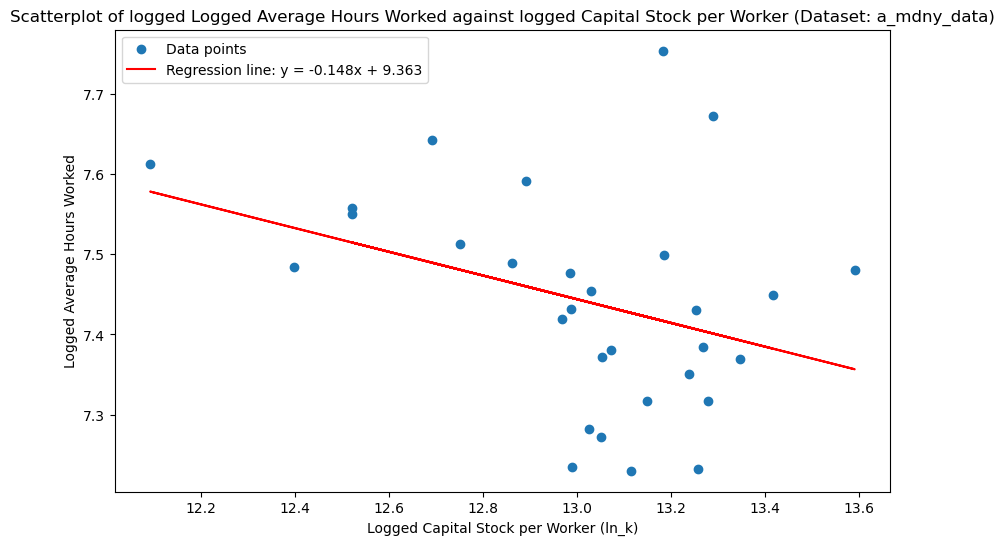

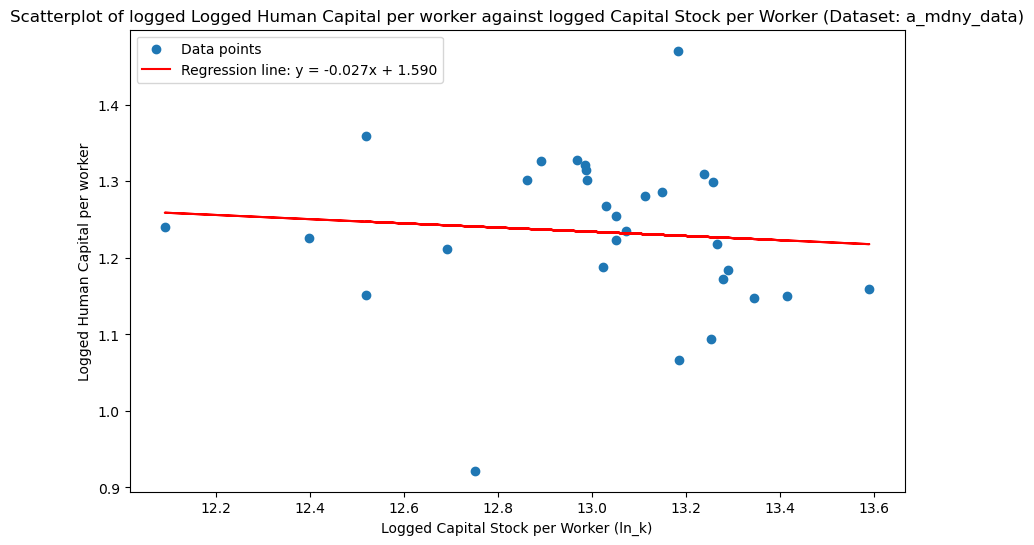

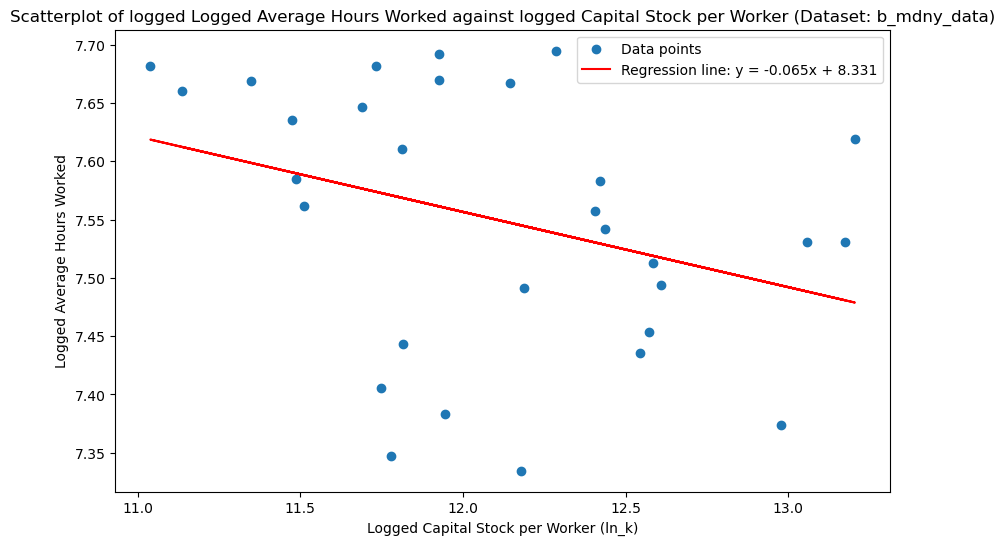

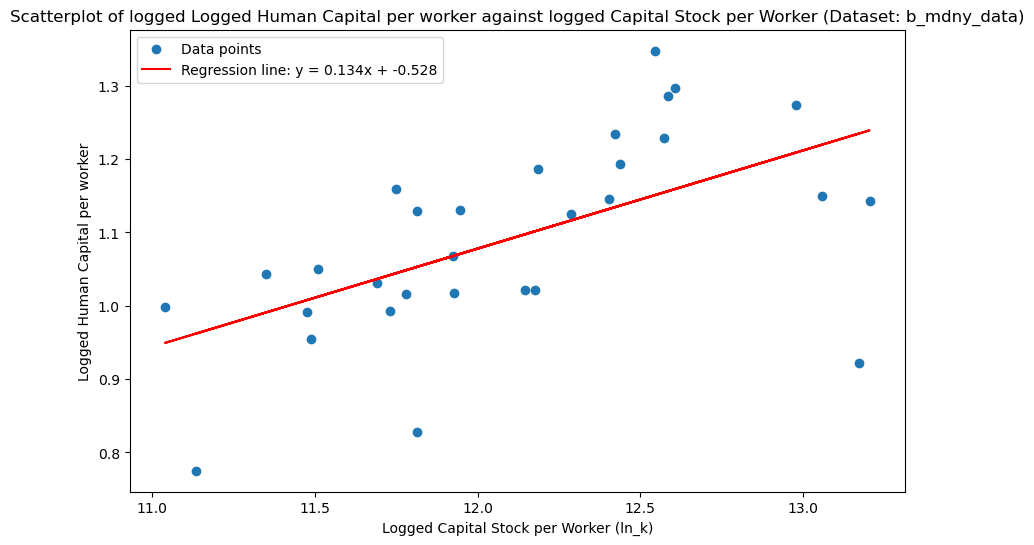

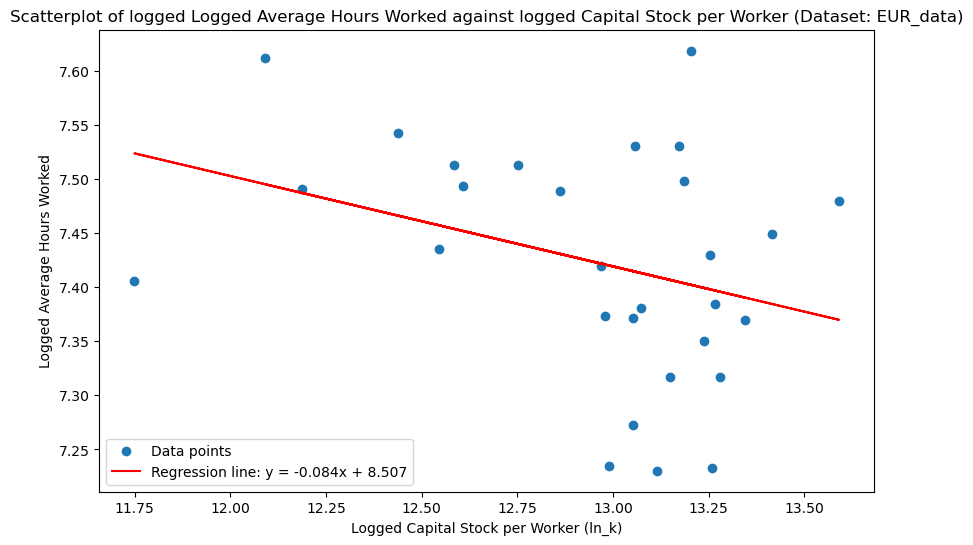

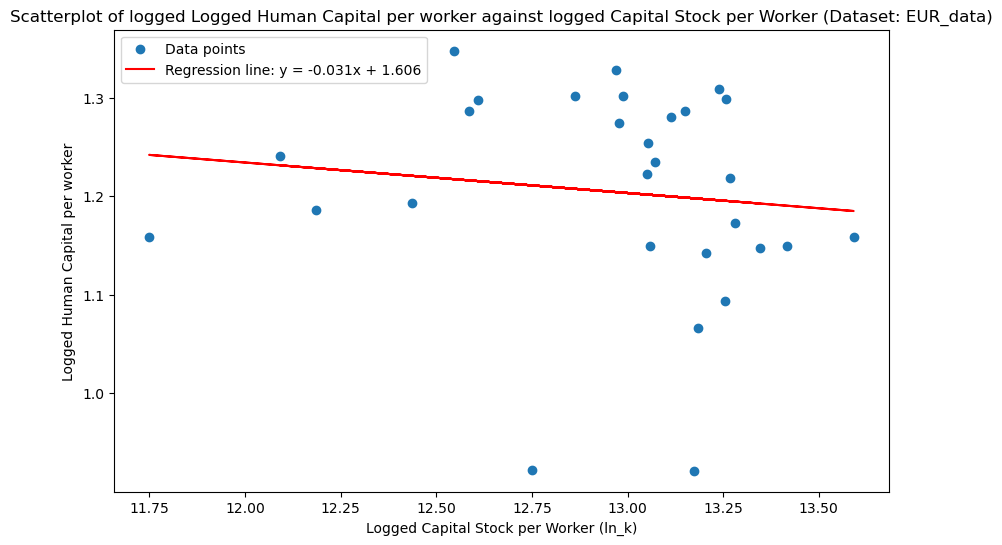

In [29]:
datasets = {
    'a_mdny_data': a_mdny_data,
    'b_mdny_data': b_mdny_data,
    'EUR_data': EUR_data}

y_variables = {
    'ln_avh': 'Logged Average Hours Worked',
    'ln_h': 'Logged Human Capital per worker'}

for dataset_name, dataset in datasets.items():
    for y_variable, y_label in y_variables.items():
        plt.figure(figsize=(10, 6))
        plt.scatter(dataset['ln_k'], dataset[y_variable], label='Data points')
        
        x_Q4 = dataset['ln_k']
        y_Q4 = dataset[y_variable]
        
        slope, intercept = np.polyfit(x_Q4, y_Q4, 1)
        dataset['regression_line'] = slope * x_Q4 + intercept
        plt.plot(x_Q4, dataset['regression_line'], color='red', label=f'Regression line: y = {slope:.3f}x + {intercept:.3f}')
        
        plt.xlabel('Logged Capital Stock per Worker (ln_k)')
        plt.ylabel(y_label)
        plt.title(f'Scatterplot of logged {y_label} against logged Capital Stock per Worker (Dataset: {dataset_name})')
        plt.legend()
        plt.show()

In what follows: above(below)-median-y countries = A(B)MY

The human capital is negatively correlated with physical capital for countries in the subset of BMY countries, and flattens for countries in the subset of AMY countries. Average hours worked are far more negatively correlated with physical capital in the subset of AMY countries than the susbet of BMY countries. 

Both of these effects contribute to a negative covariance between (1) and (2) in the subset of AMY countries (and European countries). 

To be specific, an income effect kicks in where, in richer countries, workers choose to work fewer hours as income increases. Simultaneously, higher income is correlated with a higher physical capital per worker. As a result, higher physical capital is correlated with lower average hours worked.  

### 5. 
Full results are shown in the tables under 3b and 4b. 

Output per worker (y) proxy standards of living (SOL).

Caselli: Success 2 = (1 – Success 1), Differences   in   y   (DIY)  =  Success 1 + Success 2 . 

This project: DIY = Success 1 + Success 2 + Success 3 + unexplained . 

As such, comparisons to Caselli focus on Success 1.

My benchmark analysis finds that factor accumulation has a larger role than residual efficiency in explaining cross-country differences in SOL. I find the same result for a subset of countries with below-median-y (BMY), but that efficiency has the larger role for subsets of countries with above-median-y (AMY) and European countries (EUR). Success 3, PWT10.1-provided efficiency, explains a tiny proportion of DIY in all subsets. 
Success 4, measuring the 90/10 inter-percentile ratio of factors of production (y_kh) to y, excludes outliers in the upper and lower 10% of the income distribution. Success 4 finds that differences in y_kh explain most of the DIY, and to a larger degree than Success 1, across all subsets. Success 4 is larger in AMY than in BMY, suggesting that outliers at the bottom of the y distribution may affect results more than those at the top. 

My benchmark analysis finds that the vast majority of total factor variance can be explained by variance of physical capital per worker, whilst avh-adjusted human capital plays a small role that is just larger than the covariance of both. The results from the subsets AMY, BMY and EUR agree that physical capital variance is the most significant factor. However, in contrast to the benchmark, I find negative covariance for AMY and EUR. I attribute this predominantly to an income effect. 

Unexplained: Benchmark = 38%, EUR = 16%, AMY = 0%, BMY = 20%.

Caselli finds very similar benchmark values of Success 1 = 0.39 and EUR Success 1 = 0.23. However, for AMY and BMY, we disagree. Caselli finds that in BMY, DIY can be explained most by efficiency, whereas in AMY they can be explained most by factor accumulation. My conclusions are the opposite of this.

### 6.

The human capital value in PWT10.1 is calculated using the average years of schooling (s) of 25+ year olds, with a piecewise linear function: $ {\phi(s)} $. This means that the first years of schooling have a bigger multipler ($ phi $), and a bigger effect on $ h $ than later years.
Human capital: $ h = A_h*e^{\phi(s)} $. Up to now, as in Caselli, $ A_h $ has been considered constant. 

I use 2 variables from the World Bank to remove the assumption that $ A_h $ is constant. I aim to improve the measurement of $ h $, so that my model explains the variance in y more accurately. 

1. Age dependency ratio (ADR). Ratio of dependents (those aged < 15 or > 64) to the working age population (those aged between 15 and 64.) This may reduce $ {h} $ through 2 channels. 1. Someone with the same number of years at school may have a lower $ {h} $ than an identical person if they must care for a dependent. 2. It may act as an indicator of an ageing population and health differences. In any case, I expect $ h $ to increase as $ ADR $ increases. 3. More expenditure on an ageing population (pensions) reduce expenditure on other servies which increase output. 

2. Government expenditure on education as a % of GDP (GEE). I expect that a higher $ GEE $ reflects a higher quality of education, so a higher $ h $, whilst years at school are held constant. I expect $ h $ to increase as $ GEE $

So, the expected direct relationships mean I model $ \phi $ as greater than 0. 

In [30]:
import pandas_datareader as pdr
from pandas_datareader import wb

In [31]:
Q6_data_1 = Q2_data.copy()
Q6_data_2 = Q2_data.copy()

In [32]:
pop_working_age_pc = wb.download(indicator='SP.POP.DPND', country='all', start=2019, end=2019)
govt_exp_educ_pc_of_gdp = wb.download(indicator='SE.XPD.TOTL.GD.ZS', country='all', start=2019, end=2019)

C:\Users\olive\AppData\Local\Temp\ipykernel_4656\18544892.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  pop_working_age_pc = wb.download(indicator='SP.POP.DPND', country='all', start=2019, end=2019)
C:\Users\olive\AppData\Local\Temp\ipykernel_4656\18544892.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  govt_exp_educ_pc_of_gdp = wb.download(indicator='SE.XPD.TOTL.GD.ZS', country='all', start=2019, end=2019)


In [33]:
if 'pop_working_age_pc' not in Q6_data_1.columns:
    pop_working_age_pc = pop_working_age_pc.reset_index()
    pop_working_age_pc = pop_working_age_pc.dropna()
    pop_working_age_pc = pop_working_age_pc.rename(columns={'country':'Country'})
    pop_working_age_pc = pop_working_age_pc.rename(columns={'SP.POP.DPND':'pop_working_age_pc'})
    pop_working_age_pc = pop_working_age_pc.drop(columns='year')
    Q6_data_1 = pd.merge(Q6_data_1, pop_working_age_pc, on='Country', how='inner')

else:
    print('The "pop_working_age_pc" column already exists in Q6_data_1. Skipping merge.')

if 'govt_exp_educ_pc_of_gdp' not in Q6_data_2.columns:
    govt_exp_educ_pc_of_gdp = govt_exp_educ_pc_of_gdp.reset_index()
    govt_exp_educ_pc_of_gdp = govt_exp_educ_pc_of_gdp.dropna()
    govt_exp_educ_pc_of_gdp = govt_exp_educ_pc_of_gdp.rename(columns={'country':'Country'})
    govt_exp_educ_pc_of_gdp = govt_exp_educ_pc_of_gdp.rename(columns={'SE.XPD.TOTL.GD.ZS':'govt_exp_educ_pc_of_gdp'})
    govt_exp_educ_pc_of_gdp = govt_exp_educ_pc_of_gdp.drop(columns='year')  
    Q6_data_2 = pd.merge(Q6_data_2, govt_exp_educ_pc_of_gdp, on='Country', how='inner')

else:
    print('The "govt_exp_educ_pc_of_gdp" column already exists in Q6_data_2. Skipping merge.')

if 'Country' in Q6_data_1.columns:
    Q6_data_1 = Q6_data_1.set_index('Country')

if 'Country' in Q6_data_2.columns:
    Q6_data_2 = Q6_data_2.set_index('Country')

In [34]:
print('Number of rows and columns: ', Q6_data_1.shape)
print('Number of rows and columns: ', Q6_data_2.shape)

Number of rows and columns:  (55, 15)
Number of rows and columns:  (52, 15)


In [35]:
print(Q6_data_1['pop_working_age_pc'])

Country
Argentina             55.135309
Australia             52.929503
Austria               50.049113
Belgium               55.972379
Bulgaria              56.279406
Brazil                43.144529
Canada                50.477389
Switzerland           50.592798
Chile                 44.826518
China                 43.438328
Colombia              43.951318
Costa Rica            45.201402
Cyprus                42.604522
Germany               54.725182
Denmark               56.720304
Dominican Republic    53.038764
Ecuador               52.292781
Spain                 51.819738
Estonia               57.076565
Finland               61.126689
France                62.279740
United Kingdom        57.244549
Greece                56.620986
Croatia               54.661096
Hungary               51.885555
Indonesia             48.271783
India                 49.401029
Ireland               53.141592
Iceland               49.616791
Israel                66.458701
Italy                 56.547934


In [36]:
print(Q6_data_2['govt_exp_educ_pc_of_gdp'])

Country
Argentina             4.771650
Australia             5.508589
Austria               5.217790
Belgium               6.333970
Bulgaria              4.199030
Brazil                5.963470
Canada                4.772930
Switzerland           5.014390
Chile                 5.626310
China                 4.059395
Costa Rica            6.738080
Cyprus                5.212600
Germany               5.115520
Denmark               7.255050
Dominican Republic    4.042769
Ecuador               4.245780
Spain                 4.230220
Estonia               5.260420
Finland               6.416950
France                5.354430
United Kingdom        5.261160
Greece                3.586130
Croatia               3.920080
Hungary               4.224880
Indonesia             0.964399
India                 3.897324
Ireland               3.296170
Iceland               7.601300
Israel                6.041470
Italy                 4.095270
Japan                 3.155340
Lithuania             3.964100


In [37]:
# Note that data3 has '3' just because I have used data1 and data2 for functions earlier in the project. 

# I would recommend that you start from Function 3 and then follow those explanations to understand how these higher order functions work. 

# Function 1: I added my new variables into a copy of the Q2 subset, so I have to recreate lots of the variables which were not in Q2_data but are needed to calculate success measures. 
def h_adjusted_data3(data3, variable_name, phi):
    data3['h_adjusted'] = np.exp(phi * data3[variable_name]) * data3['h']
    
    data3['one_minus_alpha_avrg'] = data3['one_minus_alpha'].mean()
    data3['alpha_avrg'] = (1 - data3['one_minus_alpha_avrg'])

    data3['y_kh'] = (data3['k'] ** data3['alpha_avrg']) * ((data3['avh'] * data3['h_adjusted']) ** (data3['one_minus_alpha_avrg']))
    data3['ln_y_kh'] = np.log(data3['y_kh'])
    data3['var_ln_y_kh'] = data3['ln_y_kh'].var()
    
    data3['var_ln_y'] = data3['ln_y'].var()

    data3['ln_A'] = np.log(data3['A'])

    data3['y_90'] = np.percentile(data3['y'], 90)
    data3['y_10'] = np.percentile(data3['y'], 10)
    data3['y_kh_90'] = np.percentile(data3['y_kh'], 90)
    data3['y_kh_10'] = np.percentile(data3['y_kh'], 10)
    data3['y_kh_90_div_y_kh_10'] = (data3['y_kh_90'] / data3['y_kh_10'])
    data3['y_90_div_y_10'] = (data3['y_90'] / data3['y_10'])

    data3['var_ln_A'] = data3['ln_A'].var()

    data3['A_accent'] = (data3['y'] / data3['y_kh'])
    data3['ln_A_accent'] = np.log(data3['A_accent'])
    data3['var_ln_A_accent'] = (data3['ln_A_accent'].var())

    # Success 1
    data3['success1'] = (data3['var_ln_y_kh'] / data3['var_ln_y'])
    data3['obvs_success_1'] = data3[['ln_y_kh', 'ln_y']].dropna().shape[0]

    # Success 2
    data3['success2'] = (data3['var_ln_A_accent'] / data3['var_ln_y'])
    data3['obvs_success_2'] = data3[['ln_A_accent', 'ln_y']].dropna().shape[0]

    # Success 3
    data3['success3'] = (data3['var_ln_A'] / data3['var_ln_y'])
    data3['obvs_success_3'] = data3[['ln_A', 'ln_y']].dropna().shape[0]

    # Success 4
    data3['success4'] = ((data3['y_kh_90_div_y_kh_10']) / (data3['y_90_div_y_10']))
    data3['obvs_success_4'] = data3['obvs_success_1']
    
    data3['unexplained'] = (1 - (data3['success1'] + data3['success2'] + data3['success3']))

    return data3

# Function 2: Extracts from adjusted_dataset the corresponding values of the stated variables of interest (VOI). 
# The adjusted_dataset, and so values of VOI, are unique to whichever phi they are created from.
# The VOI from each iteration of phi are stored in dictionary success_results, which has a set of values of VOI for each phi.
# NB: I could store the values of all variables rather than select specific variables, but for performance and memory reasons it is more efficient to choose the relevant variables only.
def extract_success_results(adjusted_data, phi):
    success_results = {
            'phi' : phi, 
            'success1' : adjusted_data['success1'].mean(),
            'success2' : adjusted_data['success2'].mean(),
            'success3' : adjusted_data['success3'].mean(),
            'success4' : adjusted_data['success4'].mean(),
            'unexplained' : adjusted_data['unexplained'].mean()}
    return success_results

# Function 3: Combines the above functions. 
# 1 Iterates over each value of phi (where phi_values range and step are defined below)
# 2 Calls Function 1 to calculate adjusted_data by calculating h_adjusted and success values, unique to that iteration of phi. adjusted_data essentially = data3 for whichever phi. 
# 3 This adjusted_data is where Function 2 extract the desired values from, which it then stores in the dictionary success_results.
# 4 Appends the desired values (success_results dictionary) into the empty list (phi_specific_success_results).
# 5 Goes to the next value of phi and repeats the process until all iterations are complete. 
# 6 Converts this dictionary (which contains all of the combinations of values of variables of interest and corresponding phi) into a pandas dataframe. 
def phi_specific_success_results(data3, variable_name, phi_values):
    phi_specific_success_results = [] # 4
    for phi in phi_values: # 1, 5
        adjusted_data = h_adjusted_data3(data3, variable_name, phi) # 2
        success_results = extract_success_results(adjusted_data, phi) # 3
        phi_specific_success_results.append(success_results) # 4
    return pd.DataFrame(phi_specific_success_results) # 6

# Specifies which dataset, variable and phi values the functions should use. 
phi_values = np.arange(0, 1, 0.01)
Q6_1_results = phi_specific_success_results(Q6_data_1, 'pop_working_age_pc', phi_values)
Q6_2_results = phi_specific_success_results(Q6_data_2, 'govt_exp_educ_pc_of_gdp', phi_values)

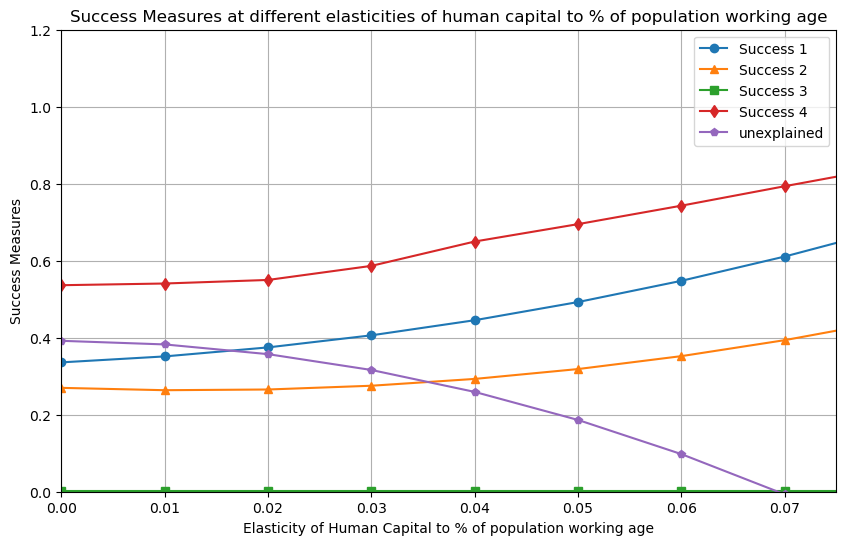

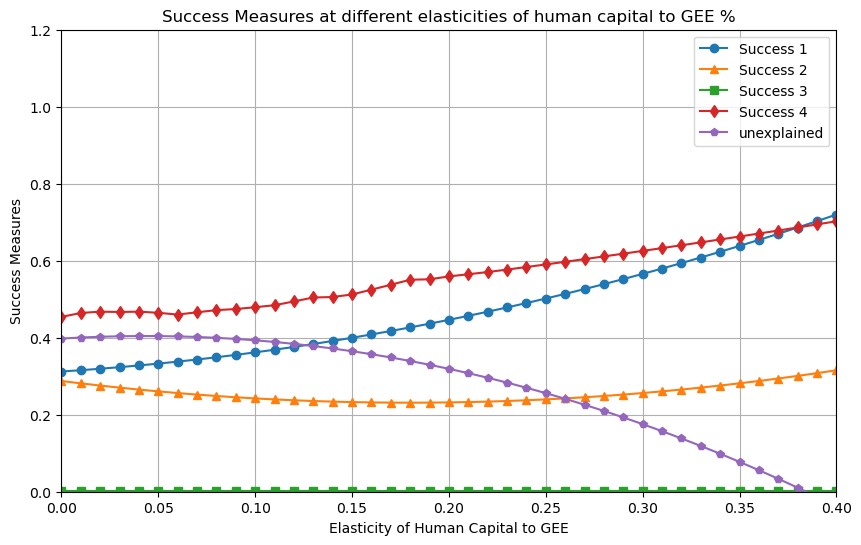

In [38]:
# Q6_data_1
plt.figure(figsize=(10, 6))
plt.plot(Q6_1_results['phi'], Q6_1_results['success1'], 'o-', label='Success 1')
plt.plot(Q6_1_results['phi'], Q6_1_results['success2'], '^-', label='Success 2')
plt.plot(Q6_1_results['phi'], Q6_1_results['success3'], 's-', label='Success 3')
plt.plot(Q6_1_results['phi'], Q6_1_results['success4'], 'd-', label='Success 4')
plt.plot(Q6_1_results['phi'], Q6_1_results['unexplained'], 'p-', label='unexplained')
plt.xlabel('Elasticity of Human Capital to % of population working age')
plt.ylabel('Success Measures')
plt.title('Success Measures at different elasticities of human capital to % of population working age')
plt.ylim(0, 1.2)
plt.xlim(0,0.075)
plt.grid(True)
plt.legend()
plt.show()

# Q6_data_2
plt.figure(figsize=(10, 6))
plt.plot(Q6_2_results['phi'], Q6_2_results['success1'], 'o-', label='Success 1')
plt.plot(Q6_2_results['phi'], Q6_2_results['success2'], '^-', label='Success 2')
plt.plot(Q6_2_results['phi'], Q6_2_results['success3'], 's-', label='Success 3')
plt.plot(Q6_2_results['phi'], Q6_2_results['success4'], 'd-', label='Success 4')
plt.plot(Q6_2_results['phi'], Q6_2_results['unexplained'], 'p-', label='unexplained')
plt.xlabel('Elasticity of Human Capital to GEE')
plt.ylabel('Success Measures')
plt.title('Success Measures at different elasticities of human capital to GEE %')
plt.ylim(0, 1.2)
plt.xlim(0, 0.4)
plt.grid(True)
plt.legend()
plt.show()

When the purple line hits the y axis, the model explains all of the differences in y without an unexplained part. I stop the limit the x axis to just after this. I have plotted the graphs up to this point because after this point the intuitions are non-sensical.

My analysis suggests that, even at low levels of elasticity, the variable '% of population at working age' (Factor A) has a big impact on Success 1. Contrarily, it takes much higher levels of elasticity, for the variable 'government expenditure as a % of GDP' (Factor B) to affect Success 1 in a significant way. 

In sum, my conclusion is that, Factor A has much more of an impact on Success 1 than Factor B, and would be a good factor to use to improve the calculation of h. Factor B would be a worse factor to use. 

I would encourage other academics to provide an estimate of the optimal elasticity

### 7.

Development accounting is a useful device for comparing income differences across countries, but it has its limitations. Namely, our model, when using data from 2019 for 61 countries, explains only ~62% of said differences. This score does, however, improve in smaller subsets. The conclusion from my benchmark subset is that factor accumulation is more significant than efficiency with which those factors are used in explaining cross-country income differences (Q3). I find Success 1 = 0.35, very similar to Caselli’s benchmark figure (0.39). More specifically, the accumulation of physical capital, rather than human capital, seems to be more influential in determining income differences, across all subsets (Q4). 

Success results depend on the subset. I find that European and above-median-y countries income differences are explained more by efficiency than factor accumulation. Below-median-y countries reach the opposite conclusion. These results differ to Caselli. 

I find that a useful way of improving the human capital measurement would be to include the % of the population of working age. It may be that care responsibilities inhibit well-educated people from working. The government expenditure on education, proportional to GDP, is less influential and requires a higher elasticity to human capital to achieve the same influence. 

Therefore, I would recommend that a government focuses on improving physical capital accumulation rather than productivity. But it depends: to a government from a low-income country, my advice would be the opposite. Also, governments should fear ageing populations.

Literature

Gregorio and Lee (2002) explain cross-country income differences by focusing specifically on education. They find that, in agreement with other literature and my results, “a significant proportion of the variation in income inequality across countries and over time remains unexplained.” They find that there is a positive relationship between ‘government social expenditure’ (not specifically on education) and equal income distribution (the Gini coefficient is used). This suggests that my education measure in Q6 would play a role. 

Howitt (2000) suggests that a Schumpeterian growth theory is more appropriate than the neoclassical Solow-Swan model that we have used for modelling cross-country income differences, because technology (a proxy for efficiency) is endogenous rather than exogenous. Innovation is considered as the engine of growth.

Caselli (2006) explains that total factor productivity isn’t universally applicable (as in our model) because different countries are specialised at using different technologies. Giving Kenya the technology of the USA won’t cause Kenya’s income per worker to equal that of the US. Poor countries choose technologies to complement unskilled labour, rather than using technologies which rich countries choose which complement skilled labour. As a result, poorer countries access a smaller menu of viable technology types, and the paper enourages the removal of barriers which prevent poor countries accessing technology of richer countries. 

Further research 

It is infamous that Japan’s ageing population (median age, 48) harms them; I encourage other academics to research the effect of ageing populations on income. Following Howitt (2003), modern data (2019) could be applied to the Schumpeterian model to see if the results agree. 


#### Appendix
F Caselli (2005) "Accounting for cross-country income differences" Handbook of economic growth 1(A) DOI: 10.1016 [2684 citations]

F Caselli, WJ Coleman (2006) "The world technology frontier" American Economic Review 96(3) DOI: 10.1257 [1111 citations]

JD Gregorio, JW Lee (2002) "Education and income inequality: new evidence from cross-country data" Review of income and wealth 48(3) DOI: 10.1111 [1251 citations]

P Howitt (2000) "Edogenous growth and cross-country income differences" American Economic Review 90(4) DOI: 10.1257 [1040 citations]